<a href="https://colab.research.google.com/github/dudududukim/Deeplearning_learning/blob/MNIST/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.4.0

In [ ]:
image = x_data[0]
print(image.reshape(1,28,28,1))

In [ ]:
image=image.reshape(1,28,28,1)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

#tensor인 conv2d를 np array로 바꿔주는 역할
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
#print("conv2d_image\n", conv2d_img)

#사실 1x2x2x1인 array에서 swapaxes는 의미 없는듯?
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
#print('conv2d_swap_img\n', conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(28,28))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')

In [ ]:
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
plt.imshow(pool.eval().reshape(28,28), cmap='gray')

In [ ]:
sess=tf.InteractiveSession()

image=x_data[2]
image=image.reshape(-1,28,28,1)
W1= tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))
print(W1.shape)
sess.run(tf.global_variables_initializer())
print(sess.run(W1))
conv2d=tf.nn.conv2d(image,W1,strides=[1,2,2,1],padding='SAME')
conv2d_img=conv2d.eval()
print(conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i,one_image in enumerate(conv2d_img):
  plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='VALID')
print(pool.shape)
pool_img=pool.eval()
pool_img=np.swapaxes(pool_img, 0, 3)
for i, img in enumerate(pool_img):
  plt.subplot(1,5,i+1), plt.imshow(img.reshape(7,7),cmap='gray')

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

 
tf.set_random_seed(777)  # for reproducibility

#file input from google drive
xy=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/train.csv',delimiter=',',dtype=np.float32)
x_data = xy[:,1:]
y_data = xy[:,0]
 
xy_test=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/mnist_test.csv',delimiter=',',dtype=np.float32)
test_x = xy_test[:,1:]
test_y = xy_test[:,0]

print('Data loaded!!')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

Data loaded!!


In [ ]:
tf.reset_default_graph()
x=tf.placeholder(tf.float32,shape=[None, 784])
x_img=tf.reshape(x, (-1,28,28,1), name='ximg')

W1=tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
l1=tf.nn.conv2d(x_img, W1, strides=(1,1,1,1),padding='SAME')
l1=tf.nn.relu(l1)
l1=tf.nn.max_pool(l1,ksize=(1,2,2,1),strides=(1,2,2,1),padding='SAME')

W2=tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
l2=tf.nn.conv2d(l1, W2, strides=(1,1,1,1),padding='SAME')
l2=tf.nn.relu(l2)
l2=tf.nn.max_pool(l2,ksize=(1,2,2,1),strides=(1,2,2,1),padding='SAME')

fcl=tf.reshape(l2,[-1,7*7*64],name='fullyconnected-layer')

Epoch: 0001, Cost: 1.936565068
Epoch: 0002, Cost: 0.991570757
Epoch: 0003, Cost: 0.615499260
Epoch: 0004, Cost: 0.487968853
Epoch: 0005, Cost: 0.421319934
Epoch: 0006, Cost: 0.378332414
Epoch: 0007, Cost: 0.347310737
Epoch: 0008, Cost: 0.323406032
Epoch: 0009, Cost: 0.304148476
Epoch: 0010, Cost: 0.288151985
Epoch: 0011, Cost: 0.274390084
Epoch: 0012, Cost: 0.262326013
Epoch: 0013, Cost: 0.251675496
Epoch: 0014, Cost: 0.242145205
Epoch: 0015, Cost: 0.233566634
Epoch: 0016, Cost: 0.225769476
Epoch: 0017, Cost: 0.218621752
Epoch: 0018, Cost: 0.212022960
Epoch: 0019, Cost: 0.205904170
Epoch: 0020, Cost: 0.200219301
Epoch: 0021, Cost: 0.194906781
Epoch: 0022, Cost: 0.189934318
Epoch: 0023, Cost: 0.185264890
Epoch: 0024, Cost: 0.180830932
Epoch: 0025, Cost: 0.176632567
Epoch: 0026, Cost: 0.172681154
Epoch: 0027, Cost: 0.168934751
Epoch: 0028, Cost: 0.165383045
Epoch: 0029, Cost: 0.162008766
Epoch: 0030, Cost: 0.158802228
Learning finished
Accuracy:  0.9557
1354 Prediction:  [3]


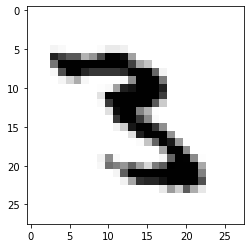

3243 Prediction:  [0]


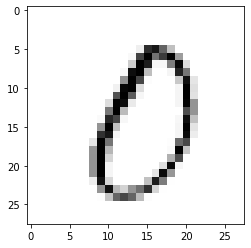

3482 Prediction:  [2]


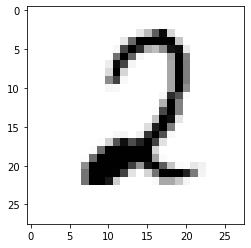

1348 Prediction:  [2]


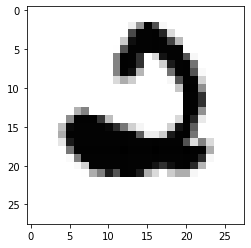

5013 Prediction:  [1]


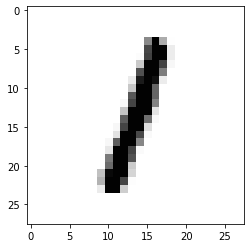

4809 Prediction:  [5]


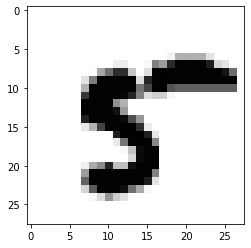

62 Prediction:  [9]


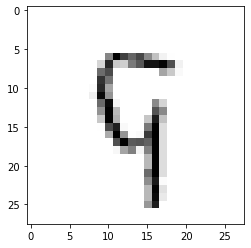

7924 Prediction:  [7]


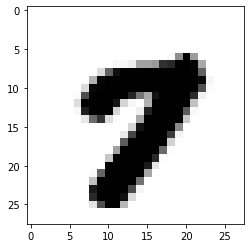

6647 Prediction:  [4]


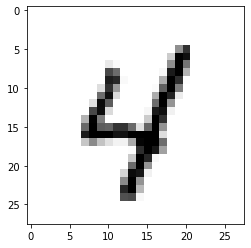

3686 Prediction:  [3]


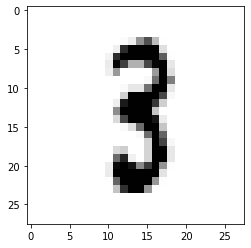

In [ ]:
nb_classes = 10
num_fcl=7*7*64

y = tf.placeholder(tf.int32, [None, 1])

keep_prob=tf.placeholder(tf.float32)

y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])

w1 = tf.get_variable('w1', shape=[num_fcl, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([nb_classes]))
'''
layer1=tf.nn.dropout(layer1,keep_prob=keep_prob)

w2 = tf.get_variable("w2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
layer2=tf.nn.relu(tf.matmul(layer1, w2)+b2)
layer2=tf.nn.dropout(layer2,keep_prob=keep_prob)

w3 = tf.get_variable("w3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
layer3=tf.nn.relu(tf.matmul(layer2, w3)+b3)
layer3=tf.nn.dropout(layer3,keep_prob=keep_prob)

w4 = tf.get_variable("w4", shape=[512, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([nb_classes]))
'''
# Hypothesis (using softmax)
logits = tf.matmul(fcl,w1)+b1
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:

  # parameters
  num_epochs = 30
  batch_size = 200
  num_iterations = int(len(x_data)/ batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
      srt = i*batch_size
      x_batch = x_data[srt:srt+batch_size]
      y_batch = y_data[srt:srt+batch_size]
      _, cost_val = sess.run([train, cost], feed_dict={x: x_batch, y:y_batch.reshape(len(y_batch),1)})
      avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: test_x, y: test_y.reshape(len(test_y),1), keep_prob:1}
      ),
  )
 
  # Get one and predict
  for step in range(10):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1], keep_prob:1}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    
    plt.show()